In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T) * np.cos(2.0 * np.pi * x / T) * x

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.1):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()
correct_sin = sin(np.arange(0, 201))

In [0]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)

In [0]:
# モデル構築

# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)
model.fit(g, h,
          batch_size=300,
          epochs=50,
          validation_split=0.1,
          # callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/50
158/158 [==============================] - 2s 12ms/step - loss: 1522.6377 - val_loss: 5172.8140
Epoch 2/50
158/158 [==============================] - 0s 2ms/step - loss: 1488.3187 - val_loss: 5089.9604
Epoch 3/50
158/158 [==============================] - 0s 2ms/step - loss: 1449.5873 - val_loss: 4994.0205
Epoch 4/50
158/158 [==============================] - 0s 2ms/step - loss: 1410.1133 - val_loss: 4914.9873
Epoch 5/50
158/158 [==============================] - 0s 2ms/step - loss: 1372.9487 - val_loss: 4847.2725
Epoch 6/50
158/158 [==============================] - 0s 2ms/step - loss: 1337.8652 - val_loss: 4782.5830
Epoch 7/50
158/158 [==============================] - 0s 2ms/step - loss: 1303.8068 - val_loss: 4718.6714
Epoch 8/50
158/158 [==============================] - 0s 2ms/step - loss: 1270.2659 - val_loss: 4658.7339
Epoch 9/50
158/158 [==============================] - 0s 2ms/step - loss: 1237.3975 - val_loss: 4602.1079


In [0]:
# 予測
predicted = model.predict(g)

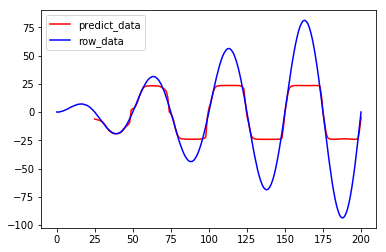

In [0]:
%matplotlib inline
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.legend()
plt.show()

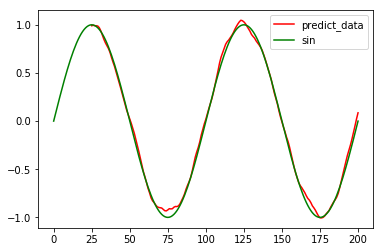

In [0]:
%matplotlib inline
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict_data")
# plt.plot(range(0, len(f)), f, color="b", label="row_data")
plt.plot(range(0, len(correct_sin)), correct_sin, color="g", label = "sin")
plt.legend()
plt.show()